# Adult census modelization

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

## Load data

In [2]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
                'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv('../../datasets/adult.data', names=column_names)
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [14]:
df = pd.DataFrame(OrdinalEncoder().fit_transform(data), columns=data.columns)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22.0,7.0,2671.0,9.0,12.0,4.0,1.0,1.0,4.0,1.0,25.0,0.0,39.0,39.0,0.0
1,33.0,6.0,2926.0,9.0,12.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,12.0,39.0,0.0
2,21.0,4.0,14086.0,11.0,8.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,39.0,39.0,0.0
3,36.0,4.0,15336.0,1.0,6.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,39.0,39.0,0.0
4,11.0,4.0,19355.0,9.0,12.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,39.0,5.0,0.0
5,20.0,4.0,17700.0,12.0,13.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,39.0,39.0,0.0
6,32.0,4.0,8536.0,6.0,4.0,3.0,8.0,1.0,2.0,0.0,0.0,0.0,15.0,23.0,0.0
7,35.0,6.0,13620.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,44.0,39.0,1.0
8,14.0,4.0,1318.0,12.0,13.0,4.0,10.0,1.0,4.0,0.0,105.0,0.0,49.0,39.0,1.0
9,25.0,4.0,8460.0,9.0,12.0,2.0,4.0,0.0,4.0,1.0,79.0,0.0,39.0,39.0,1.0


## Evaluation function

In [24]:
def evaluation (model, X_train, y_train, X_test, y_test) :
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print the classification report
    report = classification_report(y_test, y_pred)
    print(report)

    # Create and save confusion matrix
    plt.figure()
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=y_test.unique(), cmap="Spectral")
    plt.ylabel('')

    # Create and save learning curve
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10))
    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label='Train score')
    plt.plot(N, val_score.mean(axis=1), label='Val score')
    plt.legend()

    plt.show()

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      4890
         1.0       0.64      0.63      0.63      1623

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



<Figure size 640x480 with 0 Axes>

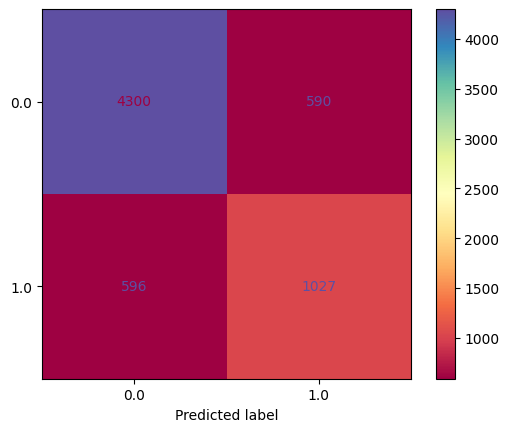

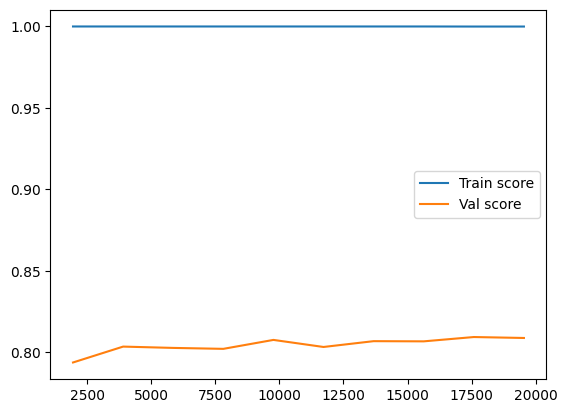

In [25]:
train, test = train_test_split(df, test_size=0.2)
X_train, y_train = train.drop('income', axis = 1), train.income
X_test, y_test = test.drop('income', axis = 1), test.income

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

evaluation(model, X_train, y_train, X_test, y_test)